In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Модель без понижения размерности признаков

In [60]:
df = pd.read_csv('dataset2.csv')
columns = [column for column in df.columns if column not in ['image', 'label']]
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)

In [63]:
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [36]:
max(abs(y_pred-y_test))

15.89996235444795

In [37]:
mean_absolute_error(y_test, y_pred)

3.594183334156334

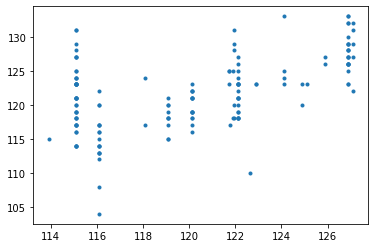

In [38]:
plt.plot(y_pred, y_test, '.')

# ----------------------------

# Permutation features importance

In [10]:
import seaborn as sns
from sklearn.inspection import permutation_importance

### №30

In [11]:
premu_train = permutation_importance(model, x_train, y_train, n_repeats=30, random_state=0)
premu_test = permutation_importance(model, x_test, y_test, n_repeats=30, random_state=0)

In [26]:
results = [premu_train]
target_col = ['label', 'image']
n_cols = len(df.columns)

x = df.drop(target_col, axis=1)

names = [ 
    'Support Vector Machine'
    ]

graph_data = {}
for result, name in zip(results, names):
    graph_data[name] = result['importances_mean']

graph_data = pd.DataFrame.from_dict(graph_data, orient='index', columns=x.columns)
graph_data.reset_index(inplace=True, drop=False)
graph_data.rename(columns={'index': 'model_name'}, inplace=True)
graph_data = graph_data.melt(id_vars='model_name')

plt.figure(figsize=[350,100])
plt.axhline(0, c='black')
[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, n_cols)]
sns.barplot(x=graph_data['variable'], y=graph_data['value'], hue=graph_data['model_name'])
plt.title("Permutation Feature Importance Across Models")
plt.xlabel("Variable Name")
plt.ylabel("Change in Mean Squared Error")
plt.savefig('permutation_importance_train_30.png')

In [13]:
# print(graph_data)

                 model_name variable     value
0    Support Vector Machine   f1_mic  0.002125
1    Support Vector Machine   f2_mic  0.007938
2    Support Vector Machine   f3_mic  0.002888
3    Support Vector Machine   f4_mic  0.004400
4    Support Vector Machine   f5_mic  0.007700
..                      ...      ...       ...
123  Support Vector Machine  f60_mac  0.007189
124  Support Vector Machine  f61_mac  0.006644
125  Support Vector Machine  f62_mac  0.005917
126  Support Vector Machine  f63_mac  0.002825
127  Support Vector Machine  f64_mac  0.003689

[128 rows x 3 columns]


In [44]:
results = [premu_test]
target_col = ['label', 'image']
n_cols = len(df.columns)

x = df.drop(target_col, axis=1)

names = [ 
    'Support Vector Machine'
    ]

graph_data = {}
for result, name in zip(results, names):
    graph_data[name] = result['importances_mean']

graph_data = pd.DataFrame.from_dict(graph_data, orient='index', columns=x.columns)
graph_data.reset_index(inplace=True, drop=False)
graph_data.rename(columns={'index': 'model_name'}, inplace=True)
graph_data = graph_data.melt(id_vars='model_name')

plt.figure(figsize=[350,100])
plt.axhline(0, c='black')
[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, n_cols)]
sns.barplot(x=graph_data['variable'], y=graph_data['value'], hue=graph_data['model_name'])
plt.title("Permutation Feature Importance Across Models")
plt.xlabel("Variable Name")
plt.ylabel("Change in Mean Squared Error")
plt.savefig('permutation_importance_test_30.png')

In [64]:
premu_train = permutation_importance(model, x_train, y_train, n_repeats=90, random_state=0)
premu_test = permutation_importance(model, x_test, y_test, n_repeats=90, random_state=0)

In [65]:
results = [premu_train]
target_col = ['label', 'image']
n_cols = len(df.columns)

x = df.drop(target_col, axis=1)

names = [ 
    'Support Vector Machine'
    ]

graph_data = {}
for result, name in zip(results, names):
    graph_data[name] = result['importances_mean']

graph_data = pd.DataFrame.from_dict(graph_data, orient='index', columns=x.columns)
graph_data.reset_index(inplace=True, drop=False)
graph_data.rename(columns={'index': 'model_name'}, inplace=True)
graph_data = graph_data.melt(id_vars='model_name')

plt.figure(figsize=[350,100])
plt.axhline(0, c='black')
[plt.axvline(i + 0.5, linestyle='--', c='black') for i in range(0, n_cols)]
sns.barplot(x=graph_data['variable'], y=graph_data['value'], hue=graph_data['model_name'])
plt.title("Permutation Feature Importance Across Models")
plt.xlabel("Variable Name")
plt.ylabel("Change in Mean Squared Error")
plt.savefig('permutation_importance_train_90.png')

# Понижение размерности признаков

In [74]:
# train
list_feature = []
for index, row in graph_data.iterrows():
    if row['value'] > 0.004:
        list_feature.append(row['variable'])
print(len(list_feature))

29


In [28]:
print(list_feature)

['f2_mic', 'f4_mic', 'f5_mic', 'f6_mic', 'f7_mic', 'f8_mic', 'f9_mic', 'f10_mic', 'f11_mic', 'f12_mic', 'f15_mic', 'f16_mic', 'f17_mic', 'f18_mic', 'f19_mic', 'f20_mic', 'f21_mic', 'f24_mic', 'f25_mic', 'f26_mic', 'f27_mic', 'f28_mic', 'f30_mic', 'f31_mic', 'f33_mic', 'f35_mic', 'f36_mic', 'f37_mic', 'f39_mic', 'f40_mic', 'f41_mic', 'f42_mic', 'f43_mic', 'f44_mic', 'f45_mic', 'f46_mic', 'f47_mic', 'f50_mic', 'f51_mic', 'f52_mic', 'f53_mic', 'f54_mic', 'f56_mic', 'f57_mic', 'f58_mic', 'f59_mic', 'f60_mic', 'f61_mic', 'f63_mic', 'f64_mic', 'f1_mac', 'f2_mac', 'f3_mac', 'f4_mac', 'f5_mac', 'f6_mac', 'f8_mac', 'f9_mac', 'f10_mac', 'f13_mac', 'f14_mac', 'f15_mac', 'f16_mac', 'f18_mac', 'f19_mac', 'f20_mac', 'f21_mac', 'f22_mac', 'f25_mac', 'f27_mac', 'f28_mac', 'f29_mac', 'f30_mac', 'f31_mac', 'f32_mac', 'f36_mac', 'f37_mac', 'f38_mac', 'f39_mac', 'f42_mac', 'f43_mac', 'f44_mac', 'f45_mac', 'f46_mac', 'f47_mac', 'f48_mac', 'f49_mac', 'f50_mac', 'f51_mac', 'f52_mac', 'f53_mac', 'f55_mac', 'f

In [77]:
df = pd.read_csv('dataset2.csv')
columns = list_feature
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [78]:
max(abs(y_pred-y_test))

12.741774304590948

In [79]:
mean_absolute_error(y_test, y_pred)

3.3301100692534655

In [45]:
# test
list_feature = []
for index, row in graph_data.iterrows():
    if row['value'] > 0.003:
        list_feature.append(row['variable'])
print(len(list_feature))

20


In [46]:
print(list_feature)

['f2_mic', 'f5_mic', 'f8_mic', 'f14_mic', 'f17_mic', 'f19_mic', 'f21_mic', 'f37_mic', 'f38_mic', 'f44_mic', 'f45_mic', 'f46_mic', 'f48_mic', 'f51_mic', 'f52_mic', 'f54_mic', 'f56_mic', 'f58_mic', 'f59_mic', 'f61_mic']


In [47]:
df = pd.read_csv('dataset2.csv')
columns = list_feature
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [48]:
max(abs(y_pred-y_test))

14.135227292162071

In [49]:
mean_absolute_error(y_test, y_pred)

3.1802760832086503

In [70]:
# train
list_feature = []
for index, row in graph_data.iterrows():
    if row['value'] > 0.003:
        list_feature.append(row['variable'])
print(len(list_feature))

41


In [71]:
df = pd.read_csv('dataset2.csv')
columns = list_feature
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [72]:
max(abs(y_pred-y_test))

12.595625571084696

In [73]:
mean_absolute_error(y_test, y_pred)

3.0393943957193272

------------------

In [91]:
# perform permutation importance
results = permutation_importance(model, x_train, y_train, n_repeats=10)

In [92]:
results

{'importances_mean': array([ 0.07493582,  0.07491328,  0.08750415,  0.03110484,  0.01556186,
         0.02630781,  0.02283146,  0.07489889,  0.02009656,  0.07419009,
         0.03148214,  0.02123072,  0.07491143,  0.03147448,  0.03010486,
         0.03643819,  0.03251058,  0.00054954,  0.02198839,  0.05328541,
         0.03044045,  0.00834437,  0.02011889,  0.02379144,  0.02276668,
        -0.00575844,  0.01728504,  0.01216755,  0.01141577]),
 'importances_std': array([0.02773197, 0.02776123, 0.02115233, 0.02126748, 0.01738072,
        0.0123746 , 0.01264437, 0.02775701, 0.01333646, 0.02713127,
        0.02127091, 0.02258984, 0.0277608 , 0.02126723, 0.00952223,
        0.01221271, 0.02400464, 0.00663061, 0.00859037, 0.02261145,
        0.0174681 , 0.00588485, 0.01139804, 0.03240327, 0.00934724,
        0.00837261, 0.00465048, 0.01220301, 0.00516776]),
 'importances': array([[ 6.93555663e-02,  6.93535021e-02,  9.52134675e-02,
          1.91822316e-06,  6.90541980e-02,  8.44449595e-02,
 

Feature: 0, Score: 0.07494
Feature: 1, Score: 0.07491
Feature: 2, Score: 0.08750
Feature: 3, Score: 0.03110
Feature: 4, Score: 0.01556
Feature: 5, Score: 0.02631
Feature: 6, Score: 0.02283
Feature: 7, Score: 0.07490
Feature: 8, Score: 0.02010
Feature: 9, Score: 0.07419
Feature: 10, Score: 0.03148
Feature: 11, Score: 0.02123
Feature: 12, Score: 0.07491
Feature: 13, Score: 0.03147
Feature: 14, Score: 0.03010
Feature: 15, Score: 0.03644
Feature: 16, Score: 0.03251
Feature: 17, Score: 0.00055
Feature: 18, Score: 0.02199
Feature: 19, Score: 0.05329
Feature: 20, Score: 0.03044
Feature: 21, Score: 0.00834
Feature: 22, Score: 0.02012
Feature: 23, Score: 0.02379
Feature: 24, Score: 0.02277
Feature: 25, Score: -0.00576
Feature: 26, Score: 0.01729
Feature: 27, Score: 0.01217
Feature: 28, Score: 0.01142


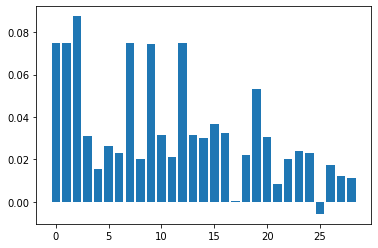

In [94]:
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature: 0, Score: 0.81516
Feature: 1, Score: 0.45112
Feature: 2, Score: 0.82941
Feature: 3, Score: 0.95728
Feature: 4, Score: 1.42582
Feature: 5, Score: 1.44487
Feature: 6, Score: 0.65132
Feature: 7, Score: 1.40940
Feature: 8, Score: 0.41376
Feature: 9, Score: 0.57921
Feature: 10, Score: 0.81434
Feature: 11, Score: 5.51696
Feature: 12, Score: 2.76017
Feature: 13, Score: 1.32513
Feature: 14, Score: 0.65603
Feature: 15, Score: 0.37689
Feature: 16, Score: 0.45984
Feature: 17, Score: 1.36529
Feature: 18, Score: 0.52046
Feature: 19, Score: 0.23586


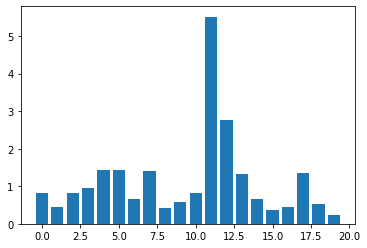

In [53]:
# get importance
importance = results.importances_std
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# Boruta algorithm

In [82]:
!pip install Boruta

     ---------------------------------------- 56.6/56.6 kB 1.0 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
from boruta import BorutaPy

In [84]:
df = pd.read_csv('dataset2.csv')
columns = list_feature
x = df[columns].to_numpy()
y = df['label'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8)
model = make_pipeline(StandardScaler(), SVR(C=35, epsilon=0.1))
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [87]:
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)

In [88]:
feat_selector.fit(np.array(x), np.array(y))

KeyError: 'max_depth'